本教程内容旨在帮助没有基础的同学快速掌握 `numpy` 的常用功能，保证日常绝大多数场景的使用。可作为机器学习或深度学习的先修课程，也可作为快速备查手册。

值得一提的是，深度学习的各大框架很多 API 和 `numpy` 也是一脉相承的哦，可以说 `numpy` 玩儿熟了，几个深度学习框架的不少 API 也同时学会了。


教程原则如下：

- 偏实用高频 API
- 展示实际用法
- 简单直接

使用说明如下：

- 每一小节都有⭐（1-5个）表示重要程度，越多越重要
- 每一小节下重要的会单独列成一个更小的小节，可以通过目录直接访问。其中分割线下面的可以补充了解
- ⚠️ 表示需要特别注意的


**特别需要提醒的是**，您在使用的过程中无须过多关注 API 各种参数细节，教程提供的用法足以应付绝大部分场景，更深入的使用方式可以自行根据需要探索或学习后续的《基础教程》。

In [116]:
# 导入 library
import numpy as np
# 画图工具
import matplotlib.pyplot as plt

## 创建和生成

本节主要介绍 array 的创建和生成。为什么会把这个放在最前面呢？主要有以下两个方面原因：

- 在实际工作过程中，我们时不时需要验证或查看 array 相关的 API 或互操作。
- 有时候在使用 sklearn，matplotlib，PyTorch，Tensorflow 等工具时也需要一些简单的数据进行实验。

所以，先学会如何快速拿到一个 array 是有很多益处的。本节我们主要介绍以下几种常用的创建方式：

- 使用列表或元组
- 使用 arange
- 使用 linspace/logspace
- 使用 ones/zeros
- 使用 random
- 从文件读取

其中，最常用的一般是 linspace/logspace 和 random，前者常常用在画坐标轴上，后者则用于生成「模拟数据」。举例来说，当我们需要画一个函数的图像时，X 往往使用 linspace 生成，然后使用函数公式求得 Y，再 plot；当我们需要构造一些输入（比如 X）或中间输入（比如 Embedding、hidden state）时，random 会异常方便。

### 从 python 列表或元组创建

⭐⭐ 重点掌握传入 list 创建一个 array 即可：`np.array(list)`


⚠️ 需要注意的是：「数据类型」。如果您足够仔细的话，可以发现下面第二组代码第 2 个数字是「小数」（注：Python 中 1. == 1.0），而 array 是要保证每个元素类型相同的，所以会帮您把 array 转为一个 float 的类型。

In [2]:
# 一个 list
np.array([1,2,3])

array([1, 2, 3])

In [3]:
# 二维（多维类似）
# 注意，有一个小数哦
np.array([[1, 2., 3], [4, 5, 6]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [322]:
# 您也可以指定数据类型
np.array([1, 2, 3], dtype=np.float16)

array([1., 2., 3.], dtype=float16)

In [117]:
# 如果指定了 dtype，输入的值都会被转为对应的类型，而且不会四舍五入
lst = [
    [1, 2, 3],
    [4, 5, 6.8]
]
np.array(lst, dtype=np.int32)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

---

In [3]:
# 一个 tuple
np.array((1.1, 2.2))

array([1.1, 2.2])

In [5]:
# tuple，一般用 list 就好，不需要使用 tuple
np.array([(1.1, 2.2, 3.3), (4.4, 5.5, 6.6)])

array([[1.1, 2.2, 3.3],
       [4.4, 5.5, 6.6]])

In [7]:
# 转换而不是上面的创建，其实是类似的，无须过于纠结
np.asarray((1,2,3))

array([1, 2, 3])

In [7]:
np.asarray(([1., 2., 3.], (4., 5., 6.)))

array([[1., 2., 3.],
       [4., 5., 6.]])

### 使用 arange 生成

⭐⭐

range 是 Python 内置的整数序列生成器，arange 是 numpy 的，效果类似，会生成一维的向量。我们偶尔会需要使用这种方式来构造 array，比如：

- 需要创建一个连续一维向量作为输入（比如编码位置时可以使用）
- 需要观察筛选、抽样的结果时，有序的 array 一般更加容易观察

⚠️ 需要注意的是：在 `reshape` 时，目标的 shape 需要的元素数量一定要和原始的元素数量相等。

In [8]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
# 注意，是小数哦
np.arange(12.0).reshape(4, 3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [19]:
np.arange(100, 124, 2).reshape(3, 2, 2)

array([[[100, 102],
        [104, 106]],

       [[108, 110],
        [112, 114]],

       [[116, 118],
        [120, 122]]])

In [20]:
# shape size 相乘要和生成的元素数量一致
np.arange(100., 124., 2).reshape(2,3,4)

ValueError: cannot reshape array of size 12 into shape (2,3,4)

### 使用 linspace/logspace 生成

⭐⭐⭐

OK，这是我们遇到的第一个比较重要的 API，前者需要传入 3 个参数：开头，结尾，数量；后者需要额外传入一个 base，它默认是 10。

⚠️ 需要注意的是：第三个参数并**不是**步长。

#### `np.linspace`

In [12]:
# 线性
np.linspace(0, 9, 10).reshape(2, 5)

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

In [13]:
np.linspace(0, 9, 6).reshape(2, 3)

array([[0. , 1.8, 3.6],
       [5.4, 7.2, 9. ]])

---

In [25]:
# 指数 base 默认为 10
np.logspace(0, 9, 6, base=np.e).reshape(2, 3)

array([[1.00000000e+00, 6.04964746e+00, 3.65982344e+01],
       [2.21406416e+02, 1.33943076e+03, 8.10308393e+03]])

In [15]:
# _ 表示上（最近）一个输出
# logspace 结果 log 后就是上面 linspace 的结果
np.log(_)

array([[0. , 1.8, 3.6],
       [5.4, 7.2, 9. ]])

下面我们更进一步看一下：

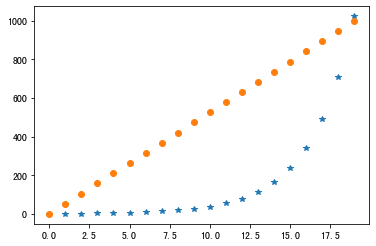

In [169]:
N = 20
x = np.arange(N)
y1 = np.linspace(0, 10, N) * 100
y2 = np.logspace(0, 10, N, base=2)

plt.plot(x, y2, '*');
plt.plot(x, y1, 'o');

In [164]:
# 检查每个元素是否为 True
# base 的 指数为 linspace 得到的就是 logspace
np.alltrue(2 ** np.linspace(0, 10, N)  == y2)

True

>⚠️ 补充：关于 array 的条件判断

In [215]:
# 不能直接用 if 判断 array 是否符合某个条件
arr = np.array([1, 2, 3])
cond1 = arr > 2
cond1

array([False, False,  True])

In [184]:
if cond1:
    print("这不行")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [185]:
# 即便你全是 True 它也不行
arr = np.array([1, 2, 3])
cond2 = arr > 0
cond2

array([ True,  True,  True])

In [187]:
if cond2:
    print("这还不行")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [188]:
# 咱们只能用 any 或 all，这个很容易犯错，请务必注意。
if cond1.any():
    print("只要有一个为True就可以，所以——我可以")

只要有一个为True就可以，所以——我可以


In [189]:
if cond2.all():
    print("所有值为True才可以，我正好这样")

所有值为True才可以，我正好这样


### 使用 ones/zeros 创建

⭐

创建全 1/0 array 的快捷方式。需要注意的是 `np.zeros_like` 或 `np.ones_like`，二者可以快速生成给定 array 一样 shape 的 0 或 1 向量，这在需要 Mask 某些位置时可能会用到。

⚠️ 需要注意的是：创建出来的 array 默认是 float 类型。

In [25]:
np.ones(3)

array([1., 1., 1.])

In [17]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [31]:
# 像给定向量那样的 0 向量（ones_like 是 1 向量）
np.zeros_like(np.ones((2,3,3)))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

### 使用 random 生成

⭐⭐⭐⭐⭐

如果要在这一节选一个最重要的 API，那一定是 `random` 无疑了，这里我们只介绍几个比较常用的「生产」数据相关的 API。它们经常用于随机生成训练或测试数据，神经网路初始化等。

⚠️ 需要注意的是：这里我们统一推荐使用新的 API 方式创建，即通过 `np.random.default_rng()` 先生成 `Generator`，然后再在此基础上生成各种分布的数据（记忆更加简便清晰）。不过我们依然会介绍就的 API 用法，因为很多代码中使用的还是旧的，您可以混个眼熟。

In [39]:
# 0-1 连续均匀分布
np.random.rand(2, 3)

array([[0.42508994, 0.5842191 , 0.09248675],
       [0.656858  , 0.88171822, 0.81744539]])

In [37]:
# 单个数
np.random.rand()

0.29322641374172986

In [42]:
# 0-1 连续均匀分布
np.random.random((3, 2))

array([[0.17586271, 0.5061715 ],
       [0.14594537, 0.34365713],
       [0.28714656, 0.40508807]])

In [97]:
# 指定上下界的连续均匀分布
np.random.uniform(-1, 1, (2, 3))

array([[ 0.66638982, -0.65327069, -0.21787878],
       [-0.63552782,  0.51072282, -0.14968825]])

In [26]:
# 上面两个的区别是 shape 的输入方式不同，无伤大雅了
# 不过从 1.17 版本后推荐这样使用（以后大家可以用新的方法）
# rng 是个 Generator，可用于生成各种分布
rng = np.random.default_rng(42)
rng

Generator(PCG64) at 0x111B5C5E0

In [133]:
# 推荐的连续均匀分布用法
rng.random((2, 3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [53]:
# 可以指定上下界，所以更加推荐这种用法
rng.uniform(0, 1, (2, 3))

array([[0.47673156, 0.59702442, 0.63523558],
       [0.68631534, 0.77560864, 0.05803685]])

In [63]:
# 随机整数（离散均匀分布），不超过给定的值（10）
np.random.randint(10, size=2)

array([6, 3])

In [65]:
# 随机整数（离散均匀分布），指定上下界和 shape
np.random.randint(0, 10, (2, 3))

array([[8, 6, 1],
       [3, 8, 1]])

In [80]:
# 上面推荐的方法，指定大小和上界
rng.integers(10, size=2)

array([9, 7])

In [75]:
# 上面推荐的方法，指定上下界
rng.integers(0, 10, (2, 3))

array([[5, 9, 1],
       [8, 5, 7]])

In [23]:
# 标准正态分布
np.random.randn(2, 4)

array([[-0.61241167, -0.55218849, -0.50470617, -1.35613877],
       [-1.34665975, -0.74064846, -2.5181665 ,  0.66866357]])

In [87]:
# 上面推荐的标准正态分布用法
rng.standard_normal((2, 4))

array([[ 0.09130331,  1.06124845, -0.79376776, -0.7004211 ],
       [ 0.71545457,  1.24926923, -1.22117522,  1.23336317]])

In [24]:
# 高斯分布
np.random.normal(0, 1, (3, 5))

array([[ 0.30037773, -0.17462372,  0.23898533,  1.23235421,  0.90514996],
       [ 0.90269753, -0.5679421 ,  0.8769029 ,  0.81726869, -0.59442623],
       [ 0.31453468, -0.18190156, -2.95932929, -0.07164822, -0.23622439]])

In [90]:
# 上面推荐的高斯分布用法
rng.normal(0, 1, (3, 5))

array([[ 2.20602146, -2.17590933,  0.80605092, -1.75363919,  0.08712213],
       [ 0.33164095,  0.33921626,  0.45251278, -0.03281331, -0.74066207],
       [-0.61835785, -0.56459129,  0.37724436, -0.81295739,  0.12044035]])

总之，一般会用的就是2个分布：均匀分布和正态（高斯）分布。另外，`size` 可以指定 shape。

In [211]:
rng = np.random.default_rng(42)

In [212]:
# 离散均匀分布
rng.integers(low=0, high=10, size=5)

array([0, 7, 6, 4, 4])

In [213]:
# 连续均匀分布
rng.uniform(low=0, high=10, size=5)

array([6.97368029, 0.94177348, 9.75622352, 7.61139702, 7.86064305])

In [214]:
# 正态（高斯）分布
rng.normal(loc=0.0, scale=1.0, size=(2, 3))

array([[-0.01680116, -0.85304393,  0.87939797],
       [ 0.77779194,  0.0660307 ,  1.12724121]])

### 从文件读取

⭐

这小节主要用于加载实现存储好的权重参数或预处理好的数据集，有时候会比较方便，比如训练好的模型参数加载到内存里用来提供推理服务，或者耗时很久的预处理数据直接存起来，多次实验时不需要重新处理。

⚠️ 需要注意的是：存储时不需要写文件名后缀，会自动添加。

In [26]:
# 直接将给定矩阵存为 a.npy
np.save('./data/a', np.array([[1, 2, 3], [4, 5, 6]]))

In [27]:
# 可以将多个矩阵存在一起，名为 `b.npz`
np.savez("./data/b", a=np.arange(12).reshape(3, 4), b=np.arange(12.).reshape(4, 3))

In [102]:
# 和上一个一样，只是压缩了
np.savez_compressed("./data/c", a=np.arange(12).reshape(3, 4), b=np.arange(12.).reshape(4, 3))

In [104]:
# 加载单个 array
np.load("data/a.npy")

array([[1, 2, 3],
       [4, 5, 6]])

In [105]:
# 加载多个，可以像字典那样取出对应的 array
arr = np.load("data/b.npz")

In [106]:
arr["a"]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [107]:
arr["b"]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [108]:
# 后缀都一样，你干脆当它和上面的没区别即可
arr = np.load("data/c.npz")

In [109]:
arr["b"]

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

## 统计和属性

本节我们从 array 的基本统计属性入手，对刚刚创建的 array 进一步的了解。主要包括以下几个方面：

- 尺寸相关
- 最大、最小、中位、分位值
- 平均、求和、标准差等

都是描述性统计相关的指标，对于我们从整体了解一个 array 很有帮助。其中，用到最多的是尺寸相关的「`shape`」，最大、最小值，平均值、求和等。

本节的内容非常简单，您只需要特别关注（记住）两个重要的特性：

- 按维度（指定 axis）求结果。一般0表示列1表示行，可以用「**沿着行/列操作**」这样理解，不确定时可以拿个例子试一下。
- 计算后保持维度（`keepdims=True`）


另外，为了便于操作，我们使用一个随机生成的 array 作为操作对象；同时，我们指定了 seed，这样每次运行，每个人看到的结果都是一样的。一般我们在训练模型时，往往需要指定 seed，这样才能在「同等条件」下进行调参。

In [413]:
#  先创建一个 Generator
rng = np.random.default_rng(seed=42)
#  再生成一个均匀分布
arr = rng.uniform(0, 1, (3, 4))
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

### 尺寸相关

⭐⭐

这一小节主要包括：维度、形状和数据量，其中形状 `shape` 我们用到的最多。

⚠️ 需要注意的是：size 不是 shape，ndim 表示有几个维度。

In [414]:
# 维度，array 是二维的（两个维度）
arr.ndim

2

#### `np.shape`

In [415]:
# 形状，返回一个 Tuple
arr.shape

(3, 4)

In [416]:
# 数据量
arr.size

12

### 最值分位

⭐⭐⭐

这一小节主要包括：最大值、最小值、中位数、其他分位数，其中『**最大值和最小值**』我们平时用到的最多。

⚠️ 需要注意的是：分位数可以是 0-1 的任意小数（表示对应分位），而且分位数并不一定在原始的 array 中。

In [417]:
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

In [418]:
# 所有元素中最大的
arr.max()

0.9756223516367559

#### `np.max/min`

In [419]:
# 按维度（列）最大值
arr.max(axis=0)

array([0.77395605, 0.97562235, 0.85859792, 0.92676499])

In [420]:
# 同理，按行
arr.max(axis=1)

array([0.85859792, 0.97562235, 0.92676499])

In [226]:
# 是否保持原来的维度
# 这个需要特别注意下，很多深度学习模型中都需要保持原有的维度进行后续计算
# shape 是 (3,1)，array 的 shape 是 (3,4)，按行，同时保持了行的维度
arr.min(axis=1, keepdims=True)

array([[0.43887844],
       [0.09417735],
       [0.12811363]])

In [230]:
# 保持维度：（1，4），原始array是（3，4）
arr.min(axis=0, keepdims=True)

array([[0.09417735, 0.43887844, 0.37079802, 0.69736803]])

In [228]:
# 一维了
arr.min(axis=0, keepdims=False)

array([0.09417735, 0.43887844, 0.37079802, 0.69736803])

---

In [164]:
# 另一种用法，不过我们一般习惯使用上面的用法，其实两者一回事
np.amax(arr, axis=0)

array([0.77395605, 0.97562235, 0.85859792, 0.92676499])

In [170]:
# 同 amax
np.amin(arr, axis=1)

array([0.43887844, 0.09417735, 0.12811363])

In [171]:
# 中位数
# 其他用法和 max，min 是一样的
np.median(arr)

0.7292538655248584

In [173]:
# 分位数，按列取1/4数
np.quantile(arr, q=0.25, axis=0)

array([0.11114549, 0.44463219, 0.56596886, 0.74171617])

In [175]:
# 分位数，按行取 3/4，同时保持维度
np.quantile(arr, q=0.75, axis=1, keepdims=True)

array([[0.79511652],
       [0.83345382],
       [0.5694807 ]])

In [188]:
# 分位数，注意，分位数可以是 0-1 之间的任何数字（分位）
# 如果是 1/2 分位，那正好是中位数
np.quantile(arr, q=1/2, axis=1)

array([0.73566204, 0.773602  , 0.41059198])

### 平均求和标准差

⭐⭐⭐

这一小节主要包括：平均值、累计求和、方差、标准差等进一步的统计指标。其中使用最多的是「平均值」。

In [189]:
arr

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

#### `np.average`

In [401]:
# 平均值
np.average(arr)

0.6051555606435642

In [402]:
# 按维度平均（列）
np.average(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

---

In [197]:
# 另一个计算平均值的 API
# 它与 average 的主要区别是，np.average 可以指定权重，即可以用于计算加权平均
# 一般建议使用 average，忘掉 mean 吧！
np.mean(arr, axis=0)

array([0.33208234, 0.62162891, 0.66351188, 0.80339911])

#### `np.sum`

In [399]:
# 求和，不多说了，类似
np.sum(arr, axis=1)

array([2.76880044, 2.61700371, 1.87606258])

In [400]:
np.sum(arr, axis=1, keepdims=True)

array([[2.76880044],
       [2.61700371],
       [1.87606258]])

---

In [200]:
# 按列累计求和
np.cumsum(arr, axis=0)

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.8681334 , 1.41450079, 1.61973762, 1.48343233],
       [0.99624703, 1.86488673, 1.99053565, 2.41019732]])

In [201]:
# 按行累计求和
np.cumsum(arr, axis=1)

array([[0.77395605, 1.21283449, 2.07143241, 2.76880044],
       [0.09417735, 1.0697997 , 1.8309394 , 2.61700371],
       [0.12811363, 0.57849957, 0.94929759, 1.87606258]])

In [202]:
# 标准差，用法类似
np.std(arr)

0.28783096517727075

In [205]:
# 按列求标准差
np.std(arr, axis=0)

array([0.3127589 , 0.25035525, 0.21076935, 0.09444968])

In [207]:
# 方差
np.var(arr, axis=1)

array([0.02464271, 0.1114405 , 0.0839356 ])

## 形状和转换

array 大多数情况下都是以多维的形式出现的，一般对超过二维的多维 array 称为「张量」，二维矩阵，一维向量。因为多维度，所以自然而然地涉及到形状的改变和转换，可以算是张量最基础的「操作」了。

本节我们主要涉及以下三个方面：

- 改变形状
- 反序
- 转置

其中，改变形状和转置都非常常用，我们建议您熟练掌握。

### 改变形状

⭐⭐⭐⭐⭐

这小节里面的 API 使用非常高频，尤其是扩展 1 维度的 `expand_dims` 和去除 1 维度的 `squeeze`，您未来会在很多神经网络架构中看到这俩货的身影。

⚠️ 需要注意的是：无论是扩展还是缩减，多或少的 shape 都是 1，`squeeze` 时如果指定维度，则该维度 shape 必须是 1。

In [405]:
# 换个整数的随机 array
rng = np.random.default_rng(seed=42)
arr = rng.integers(1, 100, (3, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

In [340]:
# 有时候您可能需要将多维 array 打平
arr.ravel()

array([ 9, 77, 65, 44, 43, 86,  9, 70, 20, 10, 53, 97])

In [341]:
arr.shape

(3, 4)

#### `np.expand_dims`

In [342]:
#### 扩展 1 个维度，需要（必须）指定维度
# 其实就是多嵌套了一下
np.expand_dims(arr, 1).shape

(3, 1, 4)

In [343]:
# 扩充维度
expanded = np.expand_dims(arr, axis=(1, 3, 4))
expanded.shape

(3, 1, 4, 1, 1)

In [344]:
# 扩充维度不能跳跃
expanded = np.expand_dims(arr, axis=(1, 3, 8))

AxisError: axis 8 is out of bounds for array of dimension 5

#### `np.squeeze`

In [345]:
# squeeze 指定 axis 的shape必须为1
np.squeeze(expanded, axis=0)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [335]:
# 如果指定了维度，那就只会去除该维度，指定的维度必须为 1
np.squeeze(expanded, axis=1).shape

(3, 3, 1, 1)

In [336]:
# 去除所有维度为 1 的
np.squeeze(expanded).shape

(3, 3)

#### `np.reshape/arr.reshape`

In [346]:
# reshape 成另一个形状
# 也可以直接变为一维向量
arr.reshape(2, 2, 3)

array([[[ 9, 77, 65],
        [44, 43, 86]],

       [[ 9, 70, 20],
        [10, 53, 97]]])

In [347]:
# 可以偷懒，使用 -1 表示其他维度（此处 -1 为 3），注意，reshape 参数可以是 tuple 或连续整数
arr1 = arr.reshape((4, -1))
arr1

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

In [348]:
# 元素数量必须与原array一致
arr.reshape(3, 3)

ValueError: cannot reshape array of size 12 into shape (3,3)

---

In [349]:
# 另一种变换形状的方式 —— 原地变换
# 不过不能用-1
# 另外 resize 不一定和原来的元素数量一样多
arr2 = arr.resize((4, 3))
# 注意：上面的 reshape 会生成一个新的 array，但 resize 不会，所以我们需要用原变量名将它显示出来
# arr2 没有值
arr2

In [350]:
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

In [351]:
# 直接 resize，如果元素数量多时会提示错误
arr.resize((2, 3))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [352]:
# 可以copy一份
arrcopy = np.copy(arr)
arrcopy.resize((2, 3))
arrcopy

array([[ 9, 77, 65],
       [44, 43, 86]])

In [353]:
# arr 保持不变
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

In [354]:
# 也可以将 refcheck 设为 False
# 此时 arr 会发生变化
# 元素数量超出时，截断；元素数量不够时，0填充
arr.resize((2,3), refcheck=False)
arr

array([[ 9, 77, 65],
       [44, 43, 86]])

In [355]:
arr.resize((3, 3), refcheck=False)
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 0,  0,  0]])

In [356]:
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 0,  0,  0]])

In [357]:
# 如果用 np.resize 会略有不同
# 元素数量不够时，会自动复制
np.resize(arr, (5, 3))

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 0,  0,  0],
       [ 9, 77, 65],
       [44, 43, 86]])

In [358]:
# 元素数量多出来时，会自动截断
np.resize(arr, (2, 2))

array([[ 9, 77],
       [65, 44]])

### 反序

⭐

也可以看作是一种对原数组的转换，用的不多，可以了解一下，为接下来的索引和切片做个热身。

如果给一个字符串或数组让您反序，您可能会想到很多种方法，比如：`reversed`，或者写一个方法，或者用 Python list 的索引功能，而这也是 `numpy` 中 array 反序的方式。

In [281]:
# 字符串
s = "uevol"
s[::-1]

'loveu'

In [282]:
# 数组
lst = [1, "1", 5.2]
lst[::-1]

[5.2, '1', 1]

In [283]:
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

In [46]:
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

In [44]:
# 我们按上面的套路：默认列反序
arr[::-1]

array([[10, 53, 97],
       [ 9, 70, 20],
       [44, 43, 86],
       [ 9, 77, 65]])

In [287]:
# 列不变行反序
arr[::-1, :]

array([[10, 53, 97],
       [ 9, 70, 20],
       [44, 43, 86],
       [ 9, 77, 65]])

In [288]:
# 在不同维度上操作：行不变列反序
arr[:, ::-1]

array([[65, 77,  9],
       [86, 43, 44],
       [20, 70,  9],
       [97, 53, 10]])

In [291]:
# 行变列也变
arr[::-1, ::-1]

array([[97, 53, 10],
       [20, 70,  9],
       [86, 43, 44],
       [65, 77,  9]])

### 转置

⭐⭐⭐

转置是线性代数的基本操作，拿二维矩阵为例，通俗理解就是把它放倒，shape 反转，行变成列，列成为行。当然，对于多维也是类似的。我们建议您二维矩阵用 `arr.T`（会快很多），超过二维的张量可以用 `np.transpose`，会更加灵活些。

⚠️ 需要注意的是：一维数组转置还是自己。

In [355]:
# 一维
np.array([1,2]).T.shape

(2,)

In [49]:
arr

array([[ 9, 77, 65],
       [44, 43, 86],
       [ 9, 70, 20],
       [10, 53, 97]])

#### `arr.T`

In [50]:
# 简便用法，把所有维度顺序都给倒过来
arr.T

array([[ 9, 44,  9, 10],
       [77, 43, 70, 53],
       [65, 86, 20, 97]])

In [323]:
# 将 shape=(1,1,3,4) 的转置后得到 shape=(4,3,1,1)
arr.reshape(1, 1, 3, 4).T.shape

(4, 3, 1, 1)

In [324]:
# 同上
arr.reshape(1, 2, 2, 1, 3, 1).T.shape

(1, 3, 1, 2, 2, 1)

#### `np.transpose`

In [341]:
# 这种转置方式可以指定 axes
np.transpose(arr)

array([[ 9, 44,  9, 10],
       [77, 43, 70, 53],
       [65, 86, 20, 97]])

In [340]:
# 不指定 axes 时和 .T 是一样的
np.transpose(arr.reshape(1, 2, 2, 1, 3, 1)).shape

(1, 3, 1, 2, 2, 1)

In [347]:
# 指定 axes，不过 axes 数量必须包含所有维度的序列
# 比如两个维度就是 (0, 1)，四个就是 (0, 1, 2, 3)
# 当然，顺序可以改变，比如下面就是只转置第 2 个和第 3 个维度
# 注意，只有超过 2 维时，这样才有意义
# 下面的结果中，中间2个维度被调换顺序了，顺序就在axes中指定的
np.transpose(arr.reshape(1, 1, 3, 4), axes=(0, 2, 1, 3)).shape

(1, 3, 1, 4)

## 分解和组合

这节我们主要学习 array 的分解和组合，本节是所有章节中最重要的一节，通过本节内容，您可以充分了解 `numpy`（以及 Python 语言）的强大，这种操作上的优雅不能说后无来者，但至少前无古人了。

内容大致包括以下小节：

- 切片和索引
- 拼接
- 重复
- 分拆

其中，重中之重是「切片和索引」，它基础、它高频、它无处不在。我们强烈建议您熟练掌握，其他三个相对简单，只需要各记住一个 API 即可。

### 切片和索引

⭐⭐⭐⭐⭐

划重点！切片和索引是通过对已有 array 进行操作而得到想要的「部分」元素的行为过程。其核心动作可以概括为：按维度根据 `start:stop:step` 操作 array。

这部分内容的核心是把处理按维度分开，不处理的维度统一用 `:` 或 `...` 代替；在看操作时，也要首先关注「`,`」在哪里。要处理的维度和之前 `arange` `linspace` 等接口使用方法是一样的。

⚠️ 需要注意的是：引支持负数，即从后往前索引。

In [373]:
rng = np.random.default_rng(42)
arr = rng.integers(0, 20, (5, 4))
arr

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19],
       [14, 15, 14, 15],
       [10,  2, 16,  9]])

#### `index/slice`

In [374]:
# 最简单的索引，取第 0 行
arr[0]

array([ 1, 15, 13,  8])

In [375]:
# 最简单的切片，取第 0 行第 1 个元素
arr[0, 1]

15

In [376]:
# 然后带点范围 第 1-2 行
arr[0:3]

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19]])

In [377]:
# 离散也可以：第 1，3 行
arr[[0, 3]]

array([[ 1, 15, 13,  8],
       [14, 15, 14, 15]])

In [379]:
arr

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19],
       [14, 15, 14, 15],
       [10,  2, 16,  9]])

In [380]:
# 再来加上维度：第 1-2 行，第 1 列
arr[1:3, 1]

array([17,  1])

In [381]:
# 离散也是一样：第 1，3 行，第 0 列
arr[[1,3], [0]]

array([ 8, 14])

In [382]:
# 还可以有简写：到最后或到开始。如第 3 行到最后一行
arr[3:]

array([[14, 15, 14, 15],
       [10,  2, 16,  9]])

In [383]:
# 开始到第 3 行，第 1-3 列
arr[:3, 1:3]

array([[15, 13],
       [17,  1],
       [ 1, 10]])

In [384]:
# 还可以来点跳跃，步长：start:stop:step，第 1 行到第 4 行，间隔为 2，即第 1、3 行
arr[1: 4: 2]

array([[ 8, 17,  1, 13],
       [14, 15, 14, 15]])

In [385]:
# 加上列也可以哦，第 1、3 行，第 0、2 列
arr[1:4:2, 0:3:2]

array([[ 8,  1],
       [14, 14]])

In [386]:
arr

array([[ 1, 15, 13,  8],
       [ 8, 17,  1, 13],
       [ 4,  1, 10, 19],
       [14, 15, 14, 15],
       [10,  2, 16,  9]])

In [387]:
# 第一列的值，其实是所有其他维度第 1 维的值
arr[...,1]

array([15, 17,  1, 15,  2])

In [388]:
# 与上面类似，但用的更多
arr[:,1]

array([15, 17,  1, 15,  2])

### 拼接

⭐⭐⭐⭐

有时候我们需要对已有的几个 array 进行拼接以形成一个大的 array（常见的例子比如不同类型特征的拼接）。本小节严格来说只有两个 API：`np.concatenate` 和 `np.stack`，前者是拼接，后者是堆叠（会增加一个维度），都可以指定维度。记住，有它俩就够了。

⚠️ 需要注意的是：`hstack` 和 `vstack` 和 `stack` 没关系，反而是 `concatenate`。

In [389]:
rng = np.random.default_rng(42)

arr1 = rng.random((2, 3))
arr2 = rng.random((2, 3))
arr1, arr2

(array([[0.77395605, 0.43887844, 0.85859792],
        [0.69736803, 0.09417735, 0.97562235]]),
 array([[0.7611397 , 0.78606431, 0.12811363],
        [0.45038594, 0.37079802, 0.92676499]]))

#### `np.concatenate`

In [60]:
# 默认沿axis=0（列）连接
np.concatenate((arr1, arr2))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363],
       [0.45038594, 0.37079802, 0.92676499]])

In [61]:
# 沿 axis=1（行）连接
np.concatenate((arr1, arr2), axis=1)

array([[0.77395605, 0.43887844, 0.85859792, 0.7611397 , 0.78606431,
        0.12811363],
       [0.69736803, 0.09417735, 0.97562235, 0.45038594, 0.37079802,
        0.92676499]])

---

In [78]:
# 竖直按行顺序拼接
# 注意：vstack 虽然看起来是 stack，但其实它是 concatenate，建议您只使用 `np.concatenate`
np.vstack((arr1, arr2))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363],
       [0.45038594, 0.37079802, 0.92676499]])

In [83]:
# 水平按列顺序拼接
# 道理和 vstack 一样，建议使用 `np.concatenate` axis=1
np.hstack((arr1, arr2))

array([[0.77395605, 0.43887844, 0.85859792, 0.7611397 , 0.78606431,
        0.12811363],
       [0.69736803, 0.09417735, 0.97562235, 0.45038594, 0.37079802,
        0.92676499]])

#### `np.stack`

In [65]:
# 堆叠，默认根据 axis=0 进行
np.stack((arr1, arr2))

array([[[0.77395605, 0.43887844, 0.85859792],
        [0.69736803, 0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431, 0.12811363],
        [0.45038594, 0.37079802, 0.92676499]]])

In [88]:
_.shape

(2, 2, 3)

In [91]:
# 堆叠，根据 axis=2
np.stack((arr1, arr2), axis=2)

array([[[0.77395605, 0.7611397 ],
        [0.43887844, 0.78606431],
        [0.85859792, 0.12811363]],

       [[0.69736803, 0.45038594],
        [0.09417735, 0.37079802],
        [0.97562235, 0.92676499]]])

In [92]:
# _ 表示上一个 Cell 的输出结果
_.shape

(2, 3, 2)

---

In [96]:
# 纵深按 axis=2 堆叠，不管它就行，我们认准 `stack`
np.dstack((arr1, arr2))

array([[[0.77395605, 0.7611397 ],
        [0.43887844, 0.78606431],
        [0.85859792, 0.12811363]],

       [[0.69736803, 0.45038594],
        [0.09417735, 0.37079802],
        [0.97562235, 0.92676499]]])

In [94]:
_.shape

(2, 3, 2)

### 重复

⭐⭐⭐

重复其实是另一种拼接方式，它也可以指定要重复的维度。在有些深度学习模型数据构建中非常有用（方便）。

⚠️ 需要注意的是：是一个维度一个维度依次重复，而不是整个 array 重复。

In [66]:
rng = np.random.default_rng(42)
arr = rng.integers(0, 10, (3, 4))
arr

array([[0, 7, 6, 4],
       [4, 8, 0, 6],
       [2, 0, 5, 9]])

In [67]:
# 在 axis=0（沿着列）上重复 2 次
np.repeat(arr, 2, axis=0)

array([[0, 7, 6, 4],
       [0, 7, 6, 4],
       [4, 8, 0, 6],
       [4, 8, 0, 6],
       [2, 0, 5, 9],
       [2, 0, 5, 9]])

In [68]:
# 在 axis=1（沿着行）上重复 3 次
np.repeat(arr, 3, axis=1)

array([[0, 0, 0, 7, 7, 7, 6, 6, 6, 4, 4, 4],
       [4, 4, 4, 8, 8, 8, 0, 0, 0, 6, 6, 6],
       [2, 2, 2, 0, 0, 0, 5, 5, 5, 9, 9, 9]])

### 分拆

⭐⭐⭐

有拼接堆叠自然就有拆分，注意这不是切片和索引，就是将 array 拆成想要的几份。用的不是特别多，API 只要记住 `np.split` 就行了，其他的都是快捷方式。

⚠️ 需要注意的是：分拆的 axis 是对该维度进行拆分。

In [69]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (6, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97],
       [73, 76, 72, 78],
       [51, 13, 84, 45],
       [50, 37, 19, 92]])

#### `np.split`

In [70]:
# 默认切分列（axis=0），切成 3 份
np.split(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [129]:
# （axis=1）切分行
np.split(arr, 2, axis=1)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

---

In [123]:
# 和上面的一个效果
np.vsplit(arr, 3)

[array([[ 9, 77, 65, 44],
        [43, 86,  9, 70]]),
 array([[20, 10, 53, 97],
        [73, 76, 72, 78]]),
 array([[51, 13, 84, 45],
        [50, 37, 19, 92]])]

In [130]:
# 等价的用法
np.hsplit(arr, 2)

[array([[ 9, 77],
        [43, 86],
        [20, 10],
        [73, 76],
        [51, 13],
        [50, 37]]),
 array([[65, 44],
        [ 9, 70],
        [53, 97],
        [72, 78],
        [84, 45],
        [19, 92]])]

## 筛选和过滤

这小节与索引和切片有点类似，但倾向于从「整体」中统一筛选出「符合条件」的内容，而索引和切片更多的是依照「某种方法」切出一块内容。本小节内容同样非常重要，可以算第二个最重要的小节。主要包括以下内容：

- 条件筛选
- 提取（按条件）
- 抽样（按分布）
- 最大最小 index（特殊值）

这几个内容都很重要，使用的也非常高频。条件筛选经常用于 Mask 或异常值处理，提取则常用于结果过滤，抽样常用在数据生成（比如负样本抽样），最大最小 index 则常见于机器学习模型预测结果判定中（根据最大概率所在的 index 决定结果属于哪一类）。

In [71]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 100, (3, 4))
arr

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

### 条件筛选

⭐⭐⭐

顾名思义，根据一定的条件对 array 进行筛选（标记）并后续处理。核心 API 是 `np.where`。

⚠️ 需要注意的是：where 分别返回各维度的 index，赋值的是「不满足」条件的。

In [72]:
# 条件筛选，可以直接在整个 array 上使用条件
arr > 50

array([[False,  True,  True, False],
       [False,  True, False,  True],
       [False, False,  True,  True]])

In [138]:
# 返回满足条件的索引，因为是两个维度，所以会返回两组结果
np.where(arr > 50)

(array([0, 0, 1, 1, 2, 2]), array([1, 2, 1, 3, 2, 3]))

In [145]:
# 不满足条件的赋值，将 <=50 的替换为 -1
np.where(arr > 50, arr, -1)

array([[-1, 77, 65, -1],
       [-1, 86, -1, 70],
       [-1, -1, 53, 97]])

### 提取

⭐

在 array 中提取指定条件的值。

⚠️ 需要注意的是：提取和唯一值返回的都是一维向量。

In [146]:
# 提取指定条件的值
np.extract(arr > 50, arr)

array([77, 65, 86, 70, 53, 97])

In [148]:
# 唯一值，是另一种形式的提取
np.unique(arr)

array([ 9, 10, 20, 43, 44, 53, 65, 70, 77, 86, 97])

### 抽样

⭐⭐⭐⭐⭐

我们在跑模型时常常需要使用部分数据对整个过程快速验证，您当然可以使用 `np.random` 生成模拟数据。但有真实数据时，从真实数据中随机抽样会比较好。

⚠️ 需要注意的是：抽样的集合要求为一维向量（一般是数据的 index）。

In [73]:
rng = np.random.default_rng(42)
# 第一个参数是要抽样的集合，如果是一个整数，则表示从 0 到该值
# 第二个参数是样本大小
# 第三个参数表示结果是否可以重复
# 第四个参数表示出现的概率，长度和第一个参数一样

# 由于（0 1 2 3）中 2 和 3 的概率比较高，自然就选择了 2 和 3
rng.choice(4, 2, replace=False, p=[0.1, 0.2, 0.3, 0.4])

array([3, 2])

In [179]:
# 旧的 API
# 如果是抽样语料的 index，更多的方法是这样：
data_size = 10000
np.random.choice(data_size, 50, replace=False)

array([6339, 4894, 1531, 7814,  224, 9538, 9619, 3801, 3359, 3617, 2795,
       6627, 8501, 1681, 4212, 5085, 2439,  744, 9123, 6733, 5688, 5480,
       6983, 7058,  310, 1838, 5072,  746, 5873, 9372, 5953, 4944, 1780,
        464, 1247,  845, 1807, 7354, 4925,  547, 2996, 3909, 7344, 9617,
       8642,  661, 2453, 5475,  228, 2427])

### 最值 Index

⭐⭐⭐⭐⭐

这小节主要是两个 API：`np.argmax(min)` 和 `np.argsort`，当然最常用的还是第一个，不用说，自然是可以（需要）指定 axis 的。

In [78]:
rng = np.random.default_rng(42)
arr = rng.uniform(1, 100, (3, 4))
arr

array([[77.62164881, 44.44896554, 86.00119407, 70.03943488],
       [10.32355744, 97.58661281, 76.3528305 , 78.82036622],
       [13.68324963, 45.58820785, 37.7090044 , 92.7497339 ]])

#### `np.argmax/argmin`

In [201]:
# 所有值中最大值的 Index，基本不这么用
np.argmax(arr)

5

In [202]:
# 按列（axis=0）最大值的 Index
np.argmax(arr, axis=0)

array([0, 1, 0, 2])

In [203]:
# 按行（axis=1）最小值的 Index
np.argmin(arr, axis=1)

array([1, 0, 0])

#### `np.argsort`

In [79]:
arr

array([[77.62164881, 44.44896554, 86.00119407, 70.03943488],
       [10.32355744, 97.58661281, 76.3528305 , 78.82036622],
       [13.68324963, 45.58820785, 37.7090044 , 92.7497339 ]])

In [80]:
# 默认按行（axis=1）排序的索引
np.argsort(arr)

array([[1, 3, 0, 2],
       [0, 2, 3, 1],
       [0, 2, 1, 3]])

In [205]:
# 数据按行（axis=1）排序的索引，同上
np.argsort(arr, axis=1)

array([[1, 3, 0, 2],
       [0, 2, 3, 1],
       [0, 2, 1, 3]])

In [206]:
# 数据按列（axis=0）排序索引
np.argsort(arr, axis=0)

array([[1, 0, 2, 0],
       [2, 2, 1, 1],
       [0, 1, 0, 2]])

## 矩阵和运算

这一节我们将聚焦矩阵和相关的运算，主要包括：

- 算术（四则运算及其他基础算术）
- 广播
- 矩阵相关

这些内容其实使用非常普遍，普遍到我们甚至都不会察觉到自己在使用，而且也非常简单。当然，高纬度的计算我们这里并不涉及，但逻辑是一致的，只是更加复杂。

### 算术

⭐⭐⭐⭐

所有的算术函数均可直接运用于 array。

⚠️ 需要注意的是：`mod` 运算可以指定多个被除数。

In [425]:
rng = np.random.default_rng(42)
arr = rng.integers(1, 20, (3, 4))
arr

array([[ 2, 15, 13,  9],
       [ 9, 17,  2, 14],
       [ 4,  2, 11, 19]])

In [409]:
# +-*/ 四则运算，就跟两个数字计算一样
arr * 2

array([[ 4, 30, 26, 18],
       [18, 34,  4, 28],
       [ 8,  4, 22, 38]])

In [410]:
# 平方也可以
arr ** 2

array([[  4, 225, 169,  81],
       [ 81, 289,   4, 196],
       [ 16,   4, 121, 361]])

In [411]:
# 开方
np.sqrt(arr)

array([[1.41421356, 3.87298335, 3.60555128, 3.        ],
       [3.        , 4.12310563, 1.41421356, 3.74165739],
       [2.        , 1.41421356, 3.31662479, 4.35889894]])

In [412]:
# log
np.log(arr)

array([[0.69314718, 2.7080502 , 2.56494936, 2.19722458],
       [2.19722458, 2.83321334, 0.69314718, 2.63905733],
       [1.38629436, 0.69314718, 2.39789527, 2.94443898]])

In [427]:
# 超过5的都换成5
np.minimum(arr, 5)

array([[2, 5, 5, 5],
       [5, 5, 2, 5],
       [4, 2, 5, 5]])

In [429]:
# 低于5的都换成5
np.maximum(arr, 5)

array([[ 5, 15, 13,  9],
       [ 9, 17,  5, 14],
       [ 5,  5, 11, 19]])

In [82]:
# 四舍五入
np.round(np.sqrt(arr), 2)

array([[1.41, 3.87, 3.61, 3.  ],
       [3.  , 4.12, 1.41, 3.74],
       [2.  , 1.41, 3.32, 4.36]])

In [83]:
# floor/ceil
np.floor(np.sqrt(arr))

array([[1., 3., 3., 3.],
       [3., 4., 1., 3.],
       [2., 1., 3., 4.]])

In [84]:
np.ceil(np.sqrt(arr))

array([[2., 4., 4., 3.],
       [3., 5., 2., 4.],
       [2., 2., 4., 5.]])

In [223]:
arr

array([[ 2, 15, 13,  9],
       [ 9, 17,  2, 14],
       [ 4,  2, 11, 19]])

In [221]:
# mod <=> x % 3
np.mod(arr, 3)

array([[2, 0, 1, 0],
       [0, 2, 2, 2],
       [1, 2, 2, 1]])

In [85]:
arr-5

array([[-3, 10,  8,  4],
       [ 4, 12, -3,  9],
       [-1, -3,  6, 14]])

In [222]:
# 还可以使用多个被除数
np.mod(arr, arr-5)

array([[-1,  5,  5,  1],
       [ 1,  5, -1,  5],
       [ 0, -1,  5,  5]])

>关于广播

`numpy` 处理不同形状的 array 时使用的手段，极大地方便了使用者。在计算过程中，较小的数组会在较大的数组上进行「广播」，以便适配对方的形状。

⚠️ 需要注意的是：广播需要满足对应的形状。

In [86]:
rng = np.random.default_rng(42)
a = rng.integers(1, 100, (3, 4))
a

array([[ 9, 77, 65, 44],
       [43, 86,  9, 70],
       [20, 10, 53, 97]])

In [87]:
# 广播，后面的被当做 1 行 4 列
a + [1,2,3,4]

array([[ 10,  79,  68,  48],
       [ 44,  88,  12,  74],
       [ 21,  12,  56, 101]])

In [88]:
# 或者这样广播，后面的被当做 3 行 1 列
a + [[1], [2], [3]]

array([[ 10,  78,  66,  45],
       [ 45,  88,  11,  72],
       [ 23,  13,  56, 100]])

In [90]:
# 之前的取余也是可以的
np.mod(a, [1,2,3,4])

array([[0, 1, 2, 0],
       [0, 0, 0, 2],
       [0, 0, 2, 1]])

### 矩阵

⭐⭐⭐⭐⭐

这一小节主要介绍线性代数中矩阵的处理，我们会介绍几个矩阵相关常用的 API。

⚠️ 需要注意的是：`dot` 和 `matmul` 在高维度时表现不同。

In [392]:
rng = np.random.default_rng(42)
a = rng.integers(1, 10, (3, 2))
b = rng.integers(1, 10, (2, 4))
c = rng.integers(1, 10, (3, 3))
a, b, c

(array([[1, 7],
        [6, 4],
        [4, 8]]),
 array([[1, 7, 2, 1],
        [5, 9, 7, 7]]),
 array([[7, 8, 5],
        [2, 8, 5],
        [5, 4, 2]]))

#### `arr.dot`

In [241]:
# array 乘法
np.dot(a, b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [244]:
# 或者这样乘
a.dot(b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [94]:
# 我们看下高维度下 dot 和 matmul 的区别
# ijk, lkm -> ijlm
np.dot(np.ones((5, 2, 3)), np.ones((4, 3, 6))).shape

(5, 2, 4, 6)

#### `np.matmul`

In [394]:
# 矩阵乘法
# 与 dot 的主要区别是：如果维度 > 2，dot 只考虑最后的维度，而 matmul 则考虑所有维度
np.matmul(a, b)

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [93]:
# 同上，写起来比较好看的方法
a @ b

array([[ 36,  70,  51,  50],
       [ 26,  78,  40,  34],
       [ 44, 100,  64,  60]])

In [95]:
# ijk, ikl -> ijl
np.matmul(np.ones((5, 2, 3)), np.ones((4, 3, 6))).shape

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5,2,3)->(5,newaxis,newaxis) (4,3,6)->(4,newaxis,newaxis) and requested shape (2,6)

In [96]:
# ijk, ikl -> ijl
np.matmul(np.ones((4, 2, 3)), np.ones((4, 3, 6))).shape

(4, 2, 6)

---

In [256]:
# 点积
np.vdot(a, a)

182

In [281]:
# 对，就是点积
np.sum(a*a)

182

In [258]:
# 内积
np.inner(a, a)

array([[50, 34, 60],
       [34, 52, 56],
       [60, 56, 80]])

In [282]:
# 对，就是内积
a.dot(a.T)

array([[50, 34, 60],
       [34, 52, 56],
       [60, 56, 80]])

In [283]:
# 行列式
np.linalg.det(c)

-19.999999999999996

In [284]:
# 逆矩阵（方阵）
np.linalg.inv(c)

array([[ 0.2 , -0.2 ,  0.  ],
       [-1.05,  0.55,  1.25],
       [ 1.6 , -0.6 , -2.  ]])

## 小结和心得

恭喜您学完了 Numpy《从小白到入门》的教程，相信有此基础您在日后足以应付绝大部分的使用场景。如果您还想继续深入学习 Numpy，欢迎关注我们后续课程《从入门到精通》，在那里，我们将深入 `numpy` 内部细节，对其原理进行系统、全面的介绍。期待我们后会有期。


### 内容小结

本教程共六个部分，我们给您把最重要的（3个⭐以上的）一些 API 罗列出来供您回忆，加深印象：

- 创建和生成
  - `np.linspace(start, end, nums)`
  - `rng.integers/uniform(low, high, size)`
  - `rng.normal(loc, scale, size)`
- 统计和属性
  - `arr.shape`
  - `arr.sum/max/min(axis, keepdims)`
  - `np.average(arr, axis)`
- 形状和转换
  - `arr.reshpae/np.reshape`
  - `np.expand_dims(arr, axis)`
  - `np.squeeze(arr axis)`
  - `np.transpose(arr, axis)`
  - `arr.T`
- 分解和组合
  - `arr[start:stop:step, ...]`
  - `np.concatenate((arr1, arr2), axis)`
  - `np.stack((arr1, arr2), axis)`
  - `np.repeat(arr, repeat_num, axis)`
  - `np.split(arr, part_num, axis)`
- 筛选和过滤
  - `np.where(condition, arr, replaced_val)`
  - `rng.choice(a, size, replace=False, p=probs_size_equals_a)`
  - `rng.argmax/argmin/argsort(arr, axis)`
- 矩阵和计算
  - `+-*/`
  - `np.dot(a, b) == a.dot(b)`
  - `np.matmul(a, b) == a @ b`


### 心得技巧

- 生成/查看 array 时，注意具体的数据类型
- 很多 API 都有 axis，将它理解为「沿着」或「对」某一维度进行操作就很容易理解了

## 巩固和练习

接下来，是时候对学到的成果进行一番检验了，为此我们给您准备了两个小菜和一分多餐，请尽情享用。

背景描述：使用 iris 数据集，target 选择 0 和 1（setosa, versicolor），丢弃 2（我们只用二分类就可以了）

### 基础题目1

切分数据，要求如下：

- 针对每一 target，分别按 80%/20% 将数据切分为训练数据和测试数据
- 切分时要求每 5 个样本，取中间的 1 个为测试数据，其余为训练数据

### 基础题目2

预测结果，要求如下：

- 加载预先在训练数据上训练好的权重参数（存储参数的方法：`np.savez("data/weight", weight=weight)`）
- 使用模型 `sigmoid(W·X)` 对测试数据进行预测
- 输出预测的准确率


### 进阶题目

如果您已经对机器学习有了一定基础，不妨试试这个练习，它会使用更多 `numpy` 的 API。

使用 Numpy 实现简单神经网络，要求如下：

- 特征选择第 2 个和第 4 个（sepal width, petal width）
- 使用反向传播和梯度下降进行学习



提示：

```python
# 数据集
from sklearn.datasets import load_iris

iris = load_iris()
data = iris["data"]
target = iris["target"]

# Sigmoid
def sigmoid(x: np.array, derive: bool = False) -> np.array:
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
```

## 解答和参考

以下是练习题的参考解答。既然是参考，那就一定不是标准，您可以使用任意方式实现最终的目的得到答案。如果您愿意，使用 for 循环也是可以的，但如果最终的答案不对，还是需要重新检查一下。我们特别重视和关注过程，但结果更加重要，条条道路通罗马，咱最后得到罗马不是？

最后再引用《Unix 编程艺术》中的一个观点：先让程序「正确地」运行起来。完成>完美，健康才能快乐。

In [21]:
def sigmoid(x: np.array, derive: bool = False) -> np.array:
    # 求导数（用于反向传播）
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [23]:
from sklearn.datasets import load_iris

# 加载 iris 数据集
iris = load_iris()
# 提取 target ≤ 1 的 target，并将维度从 (length, ) 拓展为 (length, 1)
y = np.expand_dims(np.extract(iris["target"] <= 1, iris["target"]), 1)
# 根据 y 的 size 拿到对应的 x
x = iris["data"][:y.shape[0]]

### 基础题目1

In [43]:
# 有多少条数据
data_size = x.shape[0]
# 20% 作为测试数据
test_size = int(data_size * 0.2)
# 找到测试数据的 index
test_idx = [2 + i*5 for i in range(test_size)]
# 过滤掉测试数据的 index，剩下的就是训练数据的 index
train_idx = [i for i in range(data_size) if i not in test_idx]

In [48]:
# 使用训练数据的 index 得到训练数据
x_train = x[train_idx]
y_train = y[train_idx]
# 直接使用索引切片得到测试数据，当然也可以使用测试数据 index
x_test = x[2: data_size : 5]
y_test = y[2: data_size : 5]

### 基础题目2

In [79]:
# 预测函数
def predict(x, w):
    return sigmoid(x.dot(w))

In [125]:
# 加载权重，注意 key="weight"
w = np.load("./data/weight.npz")["weight"]

In [126]:
# 拿到 sigmoid 的结果，即 probability
prob = predict(x_test, w)

In [127]:
# >（或 ≥）0.5 作为 1 或 0 的标准
sum((prob > 0.5) == y_test) / len(y_test)

array([1.])

### 进阶题目

In [130]:
# 只取第2和第4个特征
x_train_part = x_train[:, [1, 3]]
x_test_part = x_test[:, [1, 3]]

In [131]:
def test(x, y, wh, wo, use_hidden: bool = False):
    """
    预测函数，如果使用隐层的话，需要增加对应的计算
    """
    if use_hidden:
        ypred = sigmoid(sigmoid(x.dot(wh)).dot(wo))
    else:
        ypred = sigmoid(x.dot(wo))
    print("Acc: %.2f" % (sum((ypred >= 0.5 ) == y) / len(y))[0])

In [132]:
def train(x, y, use_hidden: bool = False, lr: float = 0.01):
    """
    训练函数，可以支持单隐层或无隐层
    """
    hidden_size = 8 if use_hidden else x.shape[1]
    # 初始化，可以有多种初始化方式，我们这里使用 uniform
    wh = np.random.uniform(-np.sqrt(1/hidden_size), np.sqrt(1/hidden_size), (x.shape[1], hidden_size))
    wo = np.random.uniform(-1, 1, (hidden_size, 1))
    # 1000 个 Epoch
    for epoch in range(1, 1001):
        # 使用隐层
        if use_hidden:
            hidden = np.dot(x, wh)
            hidden = sigmoid(hidden)
        else:
            hidden = x
        logits = np.dot(hidden, wo)
        pred = sigmoid(logits)
        
        # 输出层的 error
        pred_err = y - pred
        # 反向传播，输出层的更新权重
        pred_delta = pred_err * sigmoid(pred, True)
        if use_hidden:
            # 隐层的 error 和更新权重
            hidd_err = pred_delta.dot(wo.T)
            hidd_delta = hidd_err * sigmoid(hidden, True)
        
        # 更新参数
        wo += lr * hidden.T.dot(pred_delta)
        if use_hidden:
            wh += lr * x.T.dot(hidd_delta)

        # 计算损失
        loss = np.mean(np.abs(pred_err))
        if epoch % 200 == 0:
            # 如果有验证集，可以在这里对验证集进行验证，结果有提升（如 loss下降或 acc 提高）时进行存储
            # 还可以根据结果提升情况设计自动提前终止的方案（比如连续 3 次不再提升）
            print("Error:" + str(loss))
    
    # 得到训练集的 Acc
    test(x, y, wh, wo, use_hidden)
    # 返回权重（参数）
    return wh, wo

In [134]:
wh, wo = train(x_train_part, y_train)

Error:0.12291230663724437
Error:0.08282596392702782
Error:0.06586770282341464
Error:0.056016204876575326
Error:0.049407934168643926
Acc: 1.00


In [135]:
test(x_test_part, y_test, wh, wo)

Acc: 1.00


In [136]:
wh, wo = train(x_train_part, y_train, True)

Error:0.16416415380726673
Error:0.08236885703184059
Error:0.058163838923958065
Error:0.04626498346103437
Error:0.03903864391270989
Acc: 1.00


In [137]:
test(x_test_part, y_test, wh, wo, True)

Acc: 1.00


## 文献和资料

- [NumPy 教程 | 菜鸟教程](https://www.runoob.com/numpy/numpy-tutorial.html)
- [NumPy 中文](https://www.numpy.org.cn/)